In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Specify each path

In [ ]:
# dataset = 'model/keypoint_classifier/keypoint.csv'
# model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
# tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
dataset = '/content/drive/MyDrive/Final Project/csv/keypoint_kk.csv'
tflite_save_path = '/content/drive/MyDrive/Final Project/model/keypoint_classifier_pinky_kk.tflite'
# model_save_path = '/content/drive/MyDrive/Final Project/keypoint_classifier.hdf5'
model_save_path = '/content/drive/MyDrive/Final Project/model/keypoint_classifier_pinky_kk.keras'

# Set number of classes

In [ ]:
NUM_CLASSES = 2

# Dataset reading

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [ ]:
X_dataset.shape
# y_dataset.shape


(3737, 42)

# Model building

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,092 (4.27 KB)

 Trainable params: 1,092 (4.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5367 - loss: 0.7000
Epoch 1: saving model to /content/drive/MyDrive/Final Project/keypoint_classifier_pinky_kk.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.5378 - loss: 0.6996 - val_accuracy: 0.7904 - val_loss: 0.6272
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6379 - loss: 0.6464   
Epoch 2: saving model to /content/drive/MyDrive/Final Project/keypoint_classifier_pinky_kk.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6382 - loss: 0.6463 - val_accuracy: 0.8984 - val_loss: 0.5866
Epoch 3/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.6641 - loss: 0.6196
Epoch 3: saving model to /content/drive/MyDrive/Final Project/keypoint_classifier_pinky_kk.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6731 - loss: 0.6223 - val_accuracy: 0.9401 - val_loss: 0.5319
Epoch 4/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6875 - loss: 0.5885
Epoch 4: sa

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9831 - loss: 0.0747 


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
[0.00654629 0.99345374]
1


# Confusion matrix

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


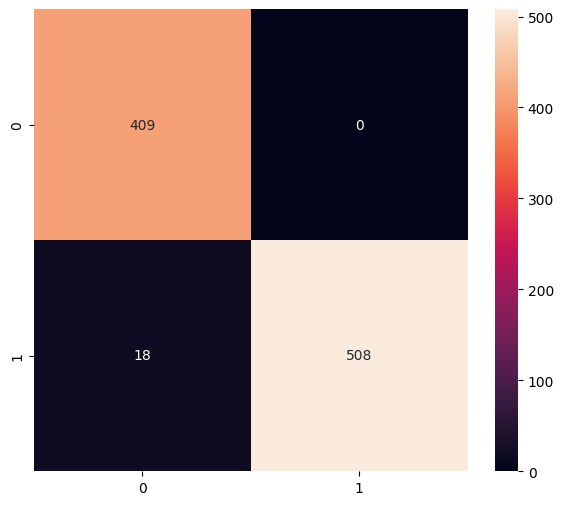

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       409
           1       1.00      0.97      0.98       526

    accuracy                           0.98       935
   macro avg       0.98      0.98      0.98       935
weighted avg       0.98      0.98      0.98       935



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

Saved artifact at '/tmp/tmpnn4xbvaq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  136919860353104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136919860361168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136919860361744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136919860362704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136919860357136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136919860356560: TensorSpec(shape=(), dtype=tf.resource, name=None)


6468

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 684 µs, sys: 0 ns, total: 684 µs
Wall time: 530 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00654629 0.99345374]
1


In [ ]:
! pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiohappyeyeballs                   2.4.6
aiohttp                            3.11.12
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.4
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            7.0.1
astropy-iers-data                  0.2025.2.17.0.34.13
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.1.0
audioread          

In [ ]:
! pip list --format=freeze > /content/drive/MyDrive/Final Project/requirements2.txt

In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/Final Project/requirements.txt")

FileNotFoundError: Cannot find file: /content/drive/MyDrive/Final Project/requirements.txt